In [1]:
from facelib.representation_extraction import EmotionRepresentationExtractor
from facelib.face_detection import FaceDetection
from facelib.face_alignment import FaceAlignment
from facelib.face_normalization import FaceNormalizer
from facelib.face_emotion_recognition import FaceEmotionRecognizer
import cv2
import matplotlib.pyplot as plt

fd = FaceDetection("MTCNN", minimum_confidence=0.95)
fa = FaceAlignment()
fn = FaceNormalizer()
model_name = 'enet_b0_8_best_afew'
# model_name='enet_b0_8_best_vgaf'
# model_name='enet_b0_8_va_mtl'
# model_name='enet_b2_8'
fer = FaceEmotionRecognizer(model_name, device="cuda:0")

fre = EmotionRepresentationExtractor().set_face_detection_model(fd, ).set_face_alignment_model(fa, ).set_face_normalizer_model(fn).set_face_emotion_recognition_model(fer)


2022-08-16 03:15:55.717558: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ahur4/anaconda3/envs/data_env/lib/python3.10/site-packages/cv2/../../lib64:
2022-08-16 03:15:55.717575: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-08-16 03:15:58.360016: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-16 03:15:58.360432: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ahur4/anaconda3/envs/data_env/lib/python3.

/home/ahur4/.hsemotions/enet_b0_8_best_afew.pt Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)


In [2]:
im = cv2.imread("test_image.jpg")[:, :, ::-1]
predictions, scores, representations = fre.extract_representation(im)


4/4 [==============================] - 0s 9ms/step


In [3]:
type(representations)

torch.Tensor

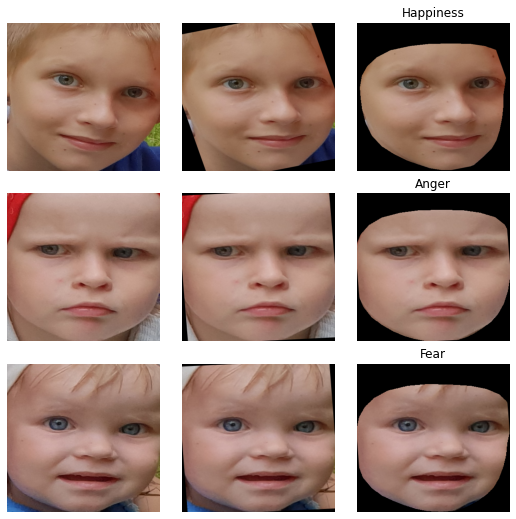

In [4]:
fig = plt.figure(figsize=(9, 9))

n = len(fre.faces)
for index in range(n):
    plt.subplot(n, 3, 3 * index + 1)
    plt.axis("off")
    plt.imshow(fre.faces[index], aspect="auto")

    plt.subplot(n, 3, 3 * index + 2)
    plt.axis("off")
    plt.imshow(fre.rotated_faces[index], aspect="auto")

    plt.subplot(n, 3, 3 * index + 3)
    plt.axis("off")
    plt.imshow(fre.normalized_rotated_faces[index], aspect="auto")

    plt.title(f"{predictions[index]}")

plt.subplots_adjust(hspace=0.15, wspace=0.15)
plt.show()